In [37]:
#Libraries for data processing, visualization, and clustering are imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
#The Spotify 2023 dataset is loaded.
df = pd.read_csv('./data/spotify2023.csv', encoding = 'latin-1')

In [39]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [41]:
#Columns with missing values are identified.
missing_values = df.isnull().sum()

missing_values[missing_values > 0]

#Unnecessary columns are dropped from the dataset.
df.drop(['in_shazam_charts', 'key'], axis = 1, inplace = True)

In [42]:
df['hit'] = [spotify + apple for spotify, apple in zip(df['in_spotify_playlists'], df['in_apple_playlists'])]

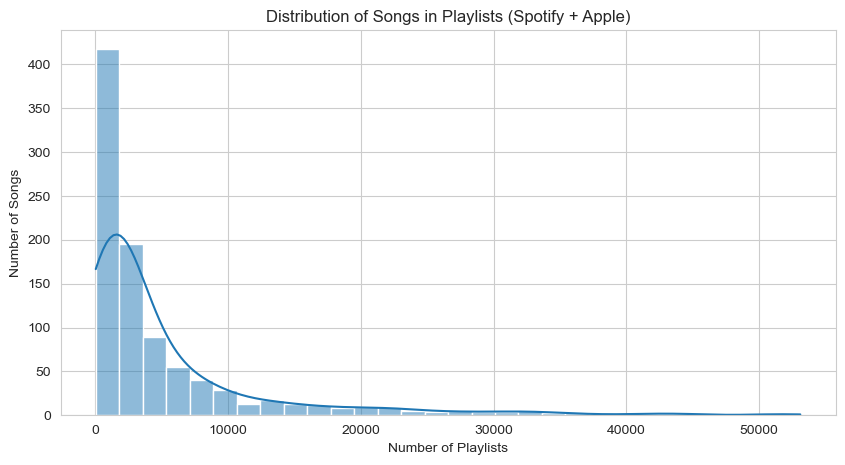

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of Seaborn
sns.set_style("whitegrid")

# Plot the distribution of the 'hit' column
plt.figure(figsize=(10, 5))
sns.histplot(df['hit'], bins=30, kde=True)
plt.title('Distribution of Songs in Playlists (Spotify + Apple)')
plt.xlabel('Number of Playlists')
plt.ylabel('Number of Songs')
plt.show()

In [44]:
threshold = df['hit'].quantile(0.90)

df['is_hit'] = df['hit'].apply(lambda x: 1 if x >= threshold else 0)


In [45]:
print("Number of hits:", df['is_hit'].sum())
print("Number of non-hits:", len(df) - df['is_hit'].sum())

Number of hits: 96
Number of non-hits: 857


In [46]:
hits = df[df['is_hit'] == 1]['hit']
non_hits = df[df['is_hit'] == 0]['hit']

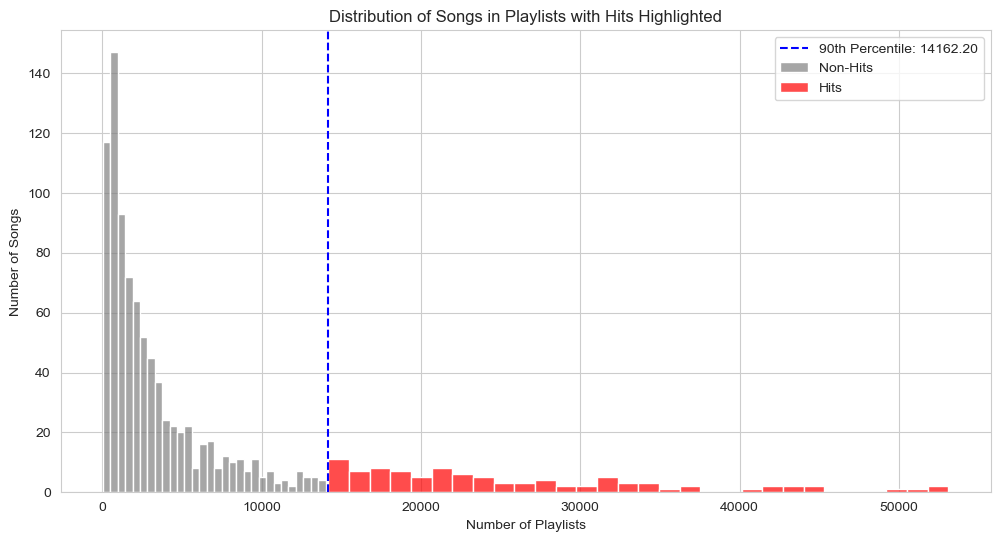

In [47]:
plt.figure(figsize=(12, 6))
sns.histplot(non_hits, bins=30, kde=False, label='Non-Hits', color='gray', alpha=0.7)
sns.histplot(hits, bins=30, kde=False, label='Hits', color='red', alpha=0.7)

plt.axvline(x=threshold, color='blue', linestyle='--', label=f'90th Percentile: {threshold:.2f}')
plt.xlabel('Number of Playlists')
plt.ylabel('Number of Songs')
plt.title('Distribution of Songs in Playlists with Hits Highlighted')
plt.legend()
plt.show()

In [59]:
# Numeric columns for scaling
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Non-numeric columns to be excluded from scaling
non_numeric_columns = X_train.select_dtypes(exclude=['float64', 'int64']).columns.tolist()
scaler = StandardScaler()

# Scale only numeric columns in training data
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])

# Scale only numeric columns in testing data
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])


In [60]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train[numeric_columns], y_train)


LogisticRegression()

In [61]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Predict on test data
y_pred = model.predict(X_test[numeric_columns])

# Display results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9947643979057592

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       175
           1       1.00      0.94      0.97        16

    accuracy                           0.99       191
   macro avg       1.00      0.97      0.98       191
weighted avg       0.99      0.99      0.99       191

Confusion Matrix:
 [[175   0]
 [  1  15]]
